# Getting Started

McKinney, W. (2022). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Jupyter.* O’Reilly Media.

Book Materials: https://github.com/wesm/pydata-book <br>
Machine Learning in Python: https://scikit-learn.org/stable/  <br>
Miniconda: https://docs.conda.io/en/latest/ <br>
Conda-Forge: https://conda-forge.org/ <br>

Python Libraries:
* NumPy
* pandas
* matplotlib
* SciPy
* statsmodels

Conventions:
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
```

It's recomended to work in other conda's environment. Using alternative environments make it easier to debug problems and ensure the stability of (base) env. Also, It's recommended the use of **miniforge** instead of Anaconda, that reduces chances of conflicting installations.

Conda commands:
- `conda env list`
- `conda create --name environment_name`
- `conda create --name my_env python=3.8`
- `conda activate environment_name`
- `conda deactivate`
- `conda install <package>`

# NumPy Basics:<br> Arrays and Vectorized Computation

NumPy arrays use much less memory than bult-in Python sequences. Also, NumPy operations are faster than regular Python code.


## Index
* [NumPy Basics: Arrays and Vectorized Computation](#numpy-bascs-arrays-and-vectorized-computation)
    * [NumPy ndarray: Multidimensional Array Object](#numpy-ndarray-multidimensional-array-object)
        * [Data Types for ndarrays](#data-types-for-ndarrays)
        * [Arithmetic with Numpy Arrays](#arithmetic-with-numpy-arrays)
        * [Basic Indexing and Slicing](#basic-indexing-and-slicing)
        * [Indexing with slices](#indexing-with-slices)
        * [Boolean Indexing](#boolean-indexing)
        * [Transposing Arrays and Swapping Axes](#transposing-arrays-and-swapping-axes)
    * [Pseudorandom Number Generation](#pseudorandom-number-generation)
    * [Universal Functions: Fast Element-Wise Array Functions](#universal-functions-fast-element-wise-array-functions)
    * [Array-Priented Programming with Arrays](#array-priented-programming-with-arrays)
        * [Expressing Conditional Logic as Array Operations](#expressing-conditional-logic-as-array-operations)
        * [Matematical and Statistical Methods](#matematical-and-statistical-methods)
        * [Methods for Boolean Arrays](#methods-for-boolean-arrays)
        * [Sorting](#sorting)
        * [Unique and Other set logic](#unique-and-other-set-logic)
    * [File input and output with arrays](#file-input-and-output-with-arrays)
    * [Linear Algebra](#linear-algebra)
    * [Random Walks](#random-walks)
* [What I can do. Radom Fly](#what-i-can-do-random-fly)

### NumPy ndarray: Multidimensional Array Object

In [7]:
import numpy as np

data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

# You can operate with the values inside the array
data 
print(data*10) 
print(data+data) 

# Checknig 'data' shape and dtype 
print(data.shape) 
print(data.dtype) 


[[ 15.  -1.  30.]
 [  0. -30.  65.]]
[[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]
(2, 3)
float64


In [17]:
"""
The array function accepts any sequence-like object.
numpy.array tries to infer a good data type for the array.
"""
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

# Creating an array 2x4 
data2 = [[1,2,3,4], [5,6,7,8]]
arr2 = np.array(data2)
print(arr2)
print(f"The shape is {arr2.shape}")

# Checking data type
print(f"\nThe data-type of Array1 is {arr1.dtype}")
print(f"The data-type of Array2 is {arr2.dtype}")

# Creating arrays full of ones
print(f"\nArray with 13 'ones': \n{np.ones(13)}")
print(f"Array 3x7 full of 'ones': \n{np.ones((3,7))}")

# Creating new array but empty
print(f"\nArray 3x4x2 empty: \n{np.empty((3,2,2))}")

# Creating a range list array (not list(range(15)) )
print(f"\nArray list of 15 numbers: \n{np.arange(15)}")

[6.  7.5 8.  0.  1. ]
[[1 2 3 4]
 [5 6 7 8]]
The shape is (2, 4)

The data-type of Array1 is float64
The data-type of Array2 is int32

Array with 13 'ones': 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Array 3x7 full of 'ones': 
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]

Array 3x4x2 empty: 
[[[9.86556544e-312 3.16202013e-322]
  [0.00000000e+000 0.00000000e+000]]

 [[1.42413554e-306 3.40712186e+175]
  [7.56676808e-067 8.07452209e+169]]

 [[2.61795352e+180 5.50198861e+170]
  [3.29406006e-032 1.29255815e+161]]]

Array list of 15 numbers: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


*Some important NumPy array creation functions (McKinney, 2022):*
|Function    |Description|
|:-----------|:----------|
|array| Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a data type or explicitly specifying a data type; copies the input data by default|
|asarray| Convert input to ndarray, but do not copy if the input is already an ndarray|
|arange| Like the built-in range but returns an ndarray instead of a list|
|ones, ones_like|Produce an array of all 1s with the given shape and data type; ones_like takes another array and produces a ones array of the same shape and data type|
|zeros, zeros_like|Like ones and ones_like but producing arrays of 0s instead|
|empty, empty_like|Create new arrays by allocating new memory, but do not populate with any values like ones and zeros|
|full, full_like|Produce an array of the given shape and data type with all values set to the indicated “fill value”; full_like takes another array and produces a filled array of the same shape and data type|
|eye, identity |Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)|

#### Data types for ndarrays

In [24]:
# Creating arrays and specifying Data type
arr1 = np.array([1.11, 2.22, 3.33], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(f"Array1 ({arr1}) data type: {arr1.dtype}")
print(f"Array2 ({arr2}) data type: {arr2.dtype}")

# Converting or 'casting' an array from one data tpe to another
flo_arr2 = arr2.astype(np.float64)
int_arr1 = arr1.astype(np.int64)
print(f"\nNow array2 ({flo_arr2}) data type's: {flo_arr2.dtype}")
print(f"Previous ({arr1}) with data type '{int_arr1.dtype}' " 
      f"now is '{int_arr1}', the decimal part has been truncated")

# Numeric string to it's correct numeric form 
num_srt = ["12.2", "13.3", "14"]
int_array = np.arange(10)

arr_num_srt = np.array(num_srt)
arr_num_flo = arr_num_srt.astype(float)

## Taking other array as dtype
arr_num_int = arr_num_flo.astype(int_array.dtype)


print(f"\nThe array '{arr_num_srt}' is '{arr_num_srt.dtype}' "
      f"\nbut we can convert it to '{arr_num_flo} wich is '{arr_num_flo.dtype}"
      f".\nAnd we can use Data type of '{int_array}' ({int_array.dtype}) to "
      f"convert in '{arr_num_int.dtype}' our '{arr_num_int}'.")



Array1 ([1.11 2.22 3.33]) data type: float64
Array2 ([1 2 3]) data type: int32

Now array2 ([1. 2. 3.]) data type's: float64
Previous ([1.11 2.22 3.33]) with data type 'int64' now is '[1 2 3]', the decimal part has been truncated

The array '['12.2' '13.3' '14']' is '<U4' 
but we can convert it to '[12.2 13.3 14. ] wich is 'float64.
And we can use Data type of '[0 1 2 3 4 5 6 7 8 9]' (int32) to convert in 'int32' our '[12 13 14]'.


*NumPy data types (McKinney, 2022):*
|Type|Type code|Description|
|:----|:------:|:---|
|int8, unit8  |  i1, u1  |Signed and unsigned 8-bit (1 byte) integer types|
|int16, uint16  |  i2, u2  | Signed and unsigned 16-bit integer types|
|int32, uint32  |  i4, u4  | Signed and unsigned 32-bit integer types|
|int64, uint64  |  i8, u8  | Signed and unsigned 64-bit integer types|
|float16  |  f2  | Half-precision floating point|
|float32  |  f4 or f  | Standard single-precision floating point; compatible with C float|
|float64  |  f8 or d  | Standard double-precision floating point; compatible with C double and Python float object|
|float128  |  f16 or g  | Extended-precision floating point|
|complex64,  <br> complex128,  <br> complex256  |  c8, c16, c32  | Complex numbers represented by two 32, 64, or 128 floats, respectively|
|bool  |  ?  | Boolean type storing True and False values|
|object  |  O  | Python object type; a value can be any Python objec|
|string_  |  S  |Fixed-length ASCII string type (1 byte per character); for example, to create a string data type with length 10, use 'S10'|
|unicode_  |  U  |Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10')|


#### Arithmetic with Numpy Arrays

We can do operations in Arrays without *for* loops, NumPy call this *vectorization*.

In [4]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]], dtype=float)

print(f"Array * Array: \n{arr*arr}")
print(f"Array - Array: \n{arr-arr}")
print(f"Array ^2: \n{arr**2}")

# You can compare arrays getting booleans as a result
arr2 = np.array([[0,5,2], [1, 9,7]])

print(f"\nIs Array2 greater than Array1?: \n{arr2 > arr}")

Array * Array: 
[[ 1.  4.  9.]
 [16. 25. 36.]]
Array - Array: 
[[0. 0. 0.]
 [0. 0. 0.]]
Array ^2: 
[[ 1.  4.  9.]
 [16. 25. 36.]]

Is Array2 greater than Array1?: 
[[False  True False]
 [False  True  True]]


#### Basic Indexing and Slicing

Distinction from Python lists: In Arrays, the data is not copied, then any 
modifications to the view will be reflected, even if it is an Slice.

But, you can copy the Slice if you specified that: `arr[5:8].copy()`

In [7]:
# One dimensional Arrays
import numpy as np
arr1 = np.arange(12)

print(arr1)

print(f"\nItem 5: {arr1[5]}")
print(f"Items 5 to 8: {arr1[5:8]}")

arr1[5:8] = 13

print(f"We've changed items 5 to 8: {arr1[5:8]}")
print(arr1)

[ 0  1  2  3  4  5  6  7  8  9 10 11]

Item 5: 5
Items 5 to 8: [5 6 7]
We've changed items 5 to 8: [13 13 13]
[ 0  1  2  3  4 13 13 13  8  9 10 11]


In [11]:
# Slicing
import numpy as np
arr1 = np.arange(12)
print(arr1)

slice1 = arr1[5:8]
print(f"Here the slice 5 to 8: \n{slice1}")
print(f"First index from slice: {slice1[1]}")

# We only change the Slice but affect to the Array
slice1[2] = 12398
print(f"\nAfter changing the index 2 from slice, "
      f"\nThis is the complete slice: {slice1}"
      f"And this is the array: \n{arr1}")


[ 0  1  2  3  4  5  6  7  8  9 10 11]
Here the slice 5 to 8: 
[5 6 7]
First index from slice: 6
After changing the index 2 from slice, 
This is the complete slice: [    5     6 12398]And this is the array: 
[    0     1     2     3     4     5     6 12398     8     9    10    11]


In [14]:
# Bidimensional Array

arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f"2D Array: \n{arr2d}")
print(f"2D Array, index 2: '{arr2d[2]}'")
print(f"2D Array, index 2 and inside, index 2: '{arr2d[2, 2]}'")

arr3d = np.array([[[11,22,33], [44,55,66]], [[77,88,99], [10.,11.,12.]]])
print(f"\n3D Array: \n{arr3d}")
print(f"\n3D Array, first section (index 0): \n{arr3d[0]}"
      "\nNow, it is a 2D array too, we can work easiest this way")

2D Array: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2D Array, index 2: '[7 8 9]'
2D Array, index 2 and inside, index 2: '9'

3D Array: 
[[[11. 22. 33.]
  [44. 55. 66.]]

 [[77. 88. 99.]
  [10. 11. 12.]]]

3D Array, first section (index 0): 
[[11. 22. 33.]
 [44. 55. 66.]]
Now, it is a 2D array too, we can work easiest this way


##### Indexing with slices

In [17]:
arr1 = np.arange(12)
print(f"One dimensional array: \n'{arr1}'")
print(f"Selecting indexes 2 to 7: '{arr1[2:7]}")

arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(f"\n2D Array: \n{arr2d}")
print(f"\nSelecting the first two rows with [:2]: \n{arr2d[:2]}")
print(f"\nNow, selecting [:2, 1:] and maintaining the same dimensions:"
      f"\n{arr2d[:2, 1:]}")
print(f"\nAnd only one 'column' with [:, :1]: \n{arr2d[:, :1]}")

One dimensional array: 
'[ 0  1  2  3  4  5  6  7  8  9 10 11]'
Selecting indexes 2 to 7: '[2 3 4 5 6]

2D Array: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Selecting the first two rows with [:2]: 
[[1 2 3]
 [4 5 6]]

Now, selecting [:2, 1:] and maintaining the same dimensions:
[[2 3]
 [5 6]]

And only one 'column' with [:, :1]: 
[[1]
 [4]
 [7]]


#### Boolean Indexing

In [8]:
# We'll have names and its data
import numpy as np

names = np.array(["Sue", "Lily", "Emma", "Sue", "Lily", "Emma", "Emma"])

data = np.array([[4, -7], [3, 2], [5, -9], [-2, 0], [2,6], [1,3], [-6, 8]])

print(f"This is names' variable: \n{names}")
print(f"\nAnd we are looking for Sue with =='Sue': \n{names == 'Sue'}")

# Which data corresponds with each name
print(f"\nThe data corresponding Emma 'data[names==Emma]'"
        f"is: \n{data[names=='Emma']}")
print(f"And her index 1 of data is: '{data[names=='Emma', 1]}'")

# Negative search
print(f"\nWhich names are not Lily: {names != 'Lily'}")
print(f"\nAnd not Lily's data: \n{data[~(names == 'Lily')]}")

# Selecting various name with '&' (and) and '|' (or)
some = (names == "Lily") | (names == "Sue")
print(f"Names Lily or Sue: '{some}'")

print(f"Data not Sue and greater than 6: \n{data[names != "Sue"] = 6}")

This is names' variable: 
['Sue' 'Lily' 'Emma' 'Sue' 'Lily' 'Emma' 'Emma']

And we are looking for Sue with =='Sue': 
[ True False False  True False False False]

The data corresponding Emma 'data[names==Emma]'is: 
[[ 5 -9]
 [ 1  3]
 [-6  8]]
And her index 1 of data is: '[-9  3  8]'

Which names are not Lily: [ True False  True  True False  True  True]

And not Lily's data: 
[[ 4 -7]
 [ 5 -9]
 [-2  0]
 [ 1  3]
 [-6  8]]


In [11]:
import numpy as np

arr = np.zeros((8, 4))

for i in range(8):
    arr[i] = i

print(f"\n{arr}")
print(f"\nArray1, 4-3-0-6 indexes: \n{arr[[4, 3, 0, 6]]}")

arr2 = np.arange(45).reshape((9,5))

print(f"\n{arr2}")

print(f"\nArray2 greater than 24{arr2 > 24}")


[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

Array1, 4-3-0-6 indexes: 
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]]

Array2 greater than 24[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


#### Transposing Arrays and Swapping Axes

In [6]:
import numpy as np

arr1 = np.arange(15).reshape((3,5))

print(arr1)

print(f"\n{arr1.T}")

print(f"\n{arr1.swapaxes(0,1)}")

print(f"\nLet's do some matrix multiplications with '.dot' and '@':"
      f"\n{arr1.T @ arr1}\n\n{np.dot(arr1.T, arr1)}")

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Let's do some matrix multiplications with '.dot' and '@':
[[125 140 155 170 185]
 [140 158 176 194 212]
 [155 176 197 218 239]
 [170 194 218 242 266]
 [185 212 239 266 293]]

[[125 140 155 170 185]
 [140 158 176 194 212]
 [155 176 197 218 239]
 [170 194 218 242 266]
 [185 212 239 266 293]]


### Pseudorandom Number Generation

numpy.random module generate whole arrays efficently from many kind of 
distributions.

*NumPy random number generator methods (McKinney, 2022)*
|Method|Description|
|---|----|
|permutation| Return a random permutation of a sequence, or return a permuted range|
|shuffle| Randomly permute a sequence in place|
|uniform |Draw samples from a uniform distribution|
|integers| Draw random integers from a given low-to-high range|
|standard_normal| Draw samples from a normal distribution with mean 0 and standard deviation 1|
|binomial| Draw samples from a binomial distribution|
|normal| Draw samples from a normal (Gaussian) distribution|
|beta| Draw samples from a beta distribution|
|chisquare| Draw samples from a chi-square distribution|
|gamma| Draw samples from a gamma distribution|
|uniform| Draw samples from a uniform [0, 1) distribution|

In [12]:
import numpy as np 

samples = np.random.standard_normal(size=(6,4))

print(f"{samples}")

[[-4.20324002e-01  1.35638465e-01 -1.61992523e+00  2.02284215e-01]
 [ 7.19578155e-01  1.69026240e+00  6.07609145e-01 -2.03233757e-01]
 [-1.10622306e+00 -1.21135912e+00  1.12011466e+00 -2.43123571e-02]
 [ 4.29393371e-01 -1.50909012e+00 -1.81308728e+00 -2.00916097e-01]
 [-1.98883164e+00 -8.36184067e-01 -3.36292353e-01 -1.27165181e+00]
 [ 1.95624108e+00  1.78038097e-04  4.71250763e-01 -8.78552832e-01]]


In [8]:
import numpy as np 
"""
    The argument 'seed' dtermines the initial state of the generator, and each
    time is used, changes.

"""
rng = np.random.default_rng(seed=5864669)

data = rng.standard_normal((2,3))

print(f"{data}")

[[0.38175573 0.09851949 0.63587688]
 [0.14532276 0.71669867 0.5631418 ]]


### Universal Functions: Fast Element-Wise Array Functions

A *ufunc* (Universal Function) performs element-wise operations on data in ndarrays.

*Some functions:*
|Function|Description|
|---|---|
|abs, fabs| Compute the absolute value element-wise for integer, floating-point, or complex values|
|sign| Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)|
|isnan| Return Boolean array indicating whether each value is NaN (Not a Number)|
|---|---|
|add| Add corresponding elements in arrays|
|subtract| Subtract elements in second array from first array|
|maximum,<br> fmax| Element-wise maximum; fmax ignores NaN|
|minimum,<br> fmin| Element-wise minimum; fmin ignores NaN|
|greater, <br>greater_equal, <br>less, <br>less_equal,<br> equal, <br> not_equal |Perform element-wise comparison, yielding Boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)|


In [12]:
arr = np.arange(5,21)

print(f"{arr}")

print(f"\n{np.sqrt(arr)}")

x = rng.standard_normal(8)
y = rng.standard_normal(8)

print(f"\nX values are: \n{x}\nand Y values:\n{y}")
print(f"\nBetween X and Y, maximun values are:\n{np.maximum(x,y)}")

# We can specified an output for ufuncs with 'out' argument and asign 
# the results into an existing array

out = np.zeros_like(arr)

np.add(arr, 1)
np.add(arr, 1, out=out)

print(f"\nOutput: \n{out}")

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

[2.23606798 2.44948974 2.64575131 2.82842712 3.         3.16227766
 3.31662479 3.46410162 3.60555128 3.74165739 3.87298335 4.
 4.12310563 4.24264069 4.35889894 4.47213595]

X values are: 
[-0.74816084 -0.77603615  0.68327199  1.28370432 -0.68344335  0.74444709
  0.94578006 -0.48237732]
and Y values:
[-0.57429412 -0.61424723 -0.36088497 -1.51370555 -0.13421366  1.46031289
 -1.61741783  0.17897458]

Between X and Y, maximun values are:
[-0.57429412 -0.61424723  0.68327199  1.28370432 -0.13421366  1.46031289
  0.94578006  0.17897458]

Output: 
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


### Array-Priented Programming with Arrays



[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


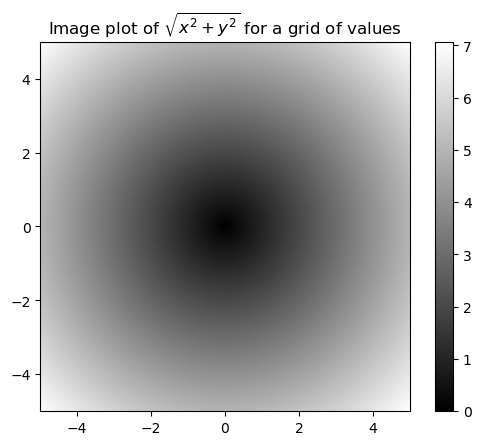

In [16]:
import numpy as np
import matplotlib.pyplot as plt

points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points) # meshgrid takes two one-dimensional
# arrays and produces two two-dimensional matrices

z = np.sqrt(xs**2 + ys**2)
print(f"{z}")

# Visualization

plt.imshow(z, cmap=plt.cm.grey, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

#### Expressing Conditional Logic as Array Operations

With `np.where(conditional, xarray, yarray)` we take a value of one array or another if the conditional is True. We can use that to overwrite values, e.g. whether the number is positive we write 2 and negative we write -2

In [20]:
xarr = np.arange(1.1, 2, 0.2)
yarr = np.arange(2.1, 3, 0.2)
cond = np.array([True, False, True, True, False])

print(f"X-Array: \n{xarr}")
print(f"Y-Array: \n{yarr}")
print(f"Condition: \n{cond}")
print(f"\nResult: \n{np.where(cond, xarr, yarr)}")

# overwriting numbers:
arr = rng.standard_normal((4,4))
print(f"\nRandom Array: \n{arr}")
print(f"\nArray boolean conversion: \n{arr > 0}")
print(f"\nWhere true = 2, false = -2: \n{np.where(arr > 0, 2, -2)}")
print(f"\nWhere true = 2, false = same number: \n{np.where(arr > 0, 2, arr)}")

X-Array: 
[1.1 1.3 1.5 1.7 1.9]
Y-Array: 
[2.1 2.3 2.5 2.7 2.9]
Condition: 
[ True False  True  True False]

Result: 
[1.1 2.3 1.5 1.7 2.9]

Random Array: 
[[-1.40253634  0.45462133 -1.27662241 -0.30563769]
 [-1.25891288  0.46052032 -0.30775935  0.76198379]
 [-0.72420566  0.18842059  0.19350286 -1.76853775]
 [ 1.95725009  0.10459295  0.06819672  0.68626764]]

Array boolean conversion: 
[[False  True False False]
 [False  True False  True]
 [False  True  True False]
 [ True  True  True  True]]

Where true = 2, false = -2: 
[[-2  2 -2 -2]
 [-2  2 -2  2]
 [-2  2  2 -2]
 [ 2  2  2  2]]

Where true = 2, false = same number: 
[[-1.40253634  2.         -1.27662241 -0.30563769]
 [-1.25891288  2.         -0.30775935  2.        ]
 [-0.72420566  2.          2.         -1.76853775]
 [ 2.          2.          2.          2.        ]]


#### Matematical and Statistical Methods

|Method|Description|
|---|---|
|sum| Sum of all the elements in the array or along an axis; zero-length arrays have sum 0|
|mean| Arithmetic mean; invalid (returns NaN) on zero-length arrays|
|std, var| Standard deviation and variance, respectively|
|min, max| Minimum and maximum|
|argmin, argmax| Indices of minimum and maximum elements, respectively|
|cumsum| Cumulative sum of elements starting from 0|
|cumprod| Cumulative product of elements starting from 1|

In multidimensional arrays, `cumsum(axis=0)` compute the cumulative sum along the rows, while `cumsum(axis=1)` is along the columns. This axis selection works too with `mean()` and `sum()`.

#### Methods for Boolean Arrays

We can `sum()` to count True values, e.g. `(arr > 0).sum()` print us the number of positive values. Also, the method `all()` will be true if every boolean value is True, thus `any()` will be true whether any value is True. Any and All works too with non-boolean arrays, where nonzero elements are **True**.

#### Sorting

With `sort()` method we can sort one dimensional arrays and specifying axis we sort the columns or rows. We can get a sorted copy of an array instead modifying the array:
```python
arr = np.array([2, -5, 9, 8, -5, -1, 6])
sort_arr = np.sort(arr)
print(sort_arr)
```

#### Unique and Other set logic

|Method|Descrption|
|---|---|
|unique(x) |Compute the sorted, unique elements in x|
|intersect1d(x, y) |Compute the sorted, common elements in x and y|
|union1d(x, y) |Compute the sorted union of elements|
|in1d(x, y) |Compute a Boolean array indicating whether each element of x is contained in y|
|setdiff1d(x, y) |Set difference, elements in x that are not in y|
|setxor1d(x, y) |Set symmetric differences; elements that are in either of the arrays, but not both|

`numpy.unique()` return the sorted unique values in an array. `numpy.in1d()` return True or False whether a value in one array is in another.

### File input and output with arrays

If we want to save and load the arrays, we can use `np.save()`/`np.savez()`/`np_savez_compressed()` and `np.load()` to do that.
```python
arr = arange(18)
np.save("array_file_name", arr)
# saving multiple arrays without and with compression, specifying format npz
np.savez("array_file.npz", a=arr1, b=arr2)
np.savez_compressed("array_file.npz", a=arr1, b=arr2)
# Loading array file, specifying the path and format
np.load("array_file_name.npy")
```

### Linear Algebra

|Function|Description|
|---|---|
|diag |Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal|
|dot |Matrix multiplication|
|trace |Compute the sum of the diagonal elements|
|det |Compute the matrix determinant|
|eig |Compute the eigenvalues and eigenvectors of a square matrix|
|inv |Compute the inverse of a square matrix|
|pinv |Compute the Moore-Penrose pseudoinverse of a matrix|
|qr |Compute the QR decomposition|
|svd |Compute the singular value decomposition (SVD)|
|solve |Solve the linear system Ax = b for x, where A is a square matrix|
|lstsq |Compute the least-squares solution to Ax = b|

### Random Walks

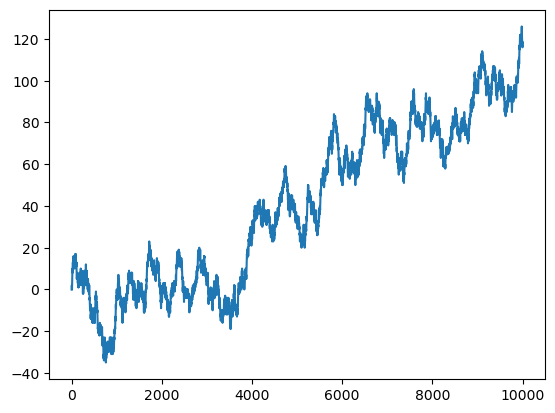

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

position = 0
random_walk = [position]
nsteps = 10_000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1 
    position += step 
    random_walk.append(position)

plt.plot(random_walk)

Minimum value: -10

Maximum value: 192


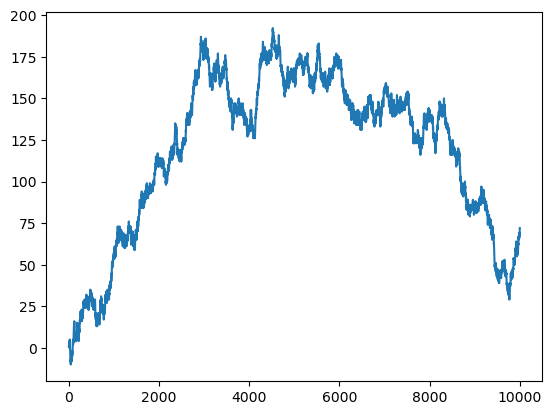

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

nsteps = 10_000
rng = np.random.default_rng(seed=28328324)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
random_walk = steps.cumsum()

print(f"Minimum value: {random_walk.min()}")
print(f"\nMaximum value: {random_walk.max()}")

plt.plot(random_walk)

## What I can do: random fly(?)

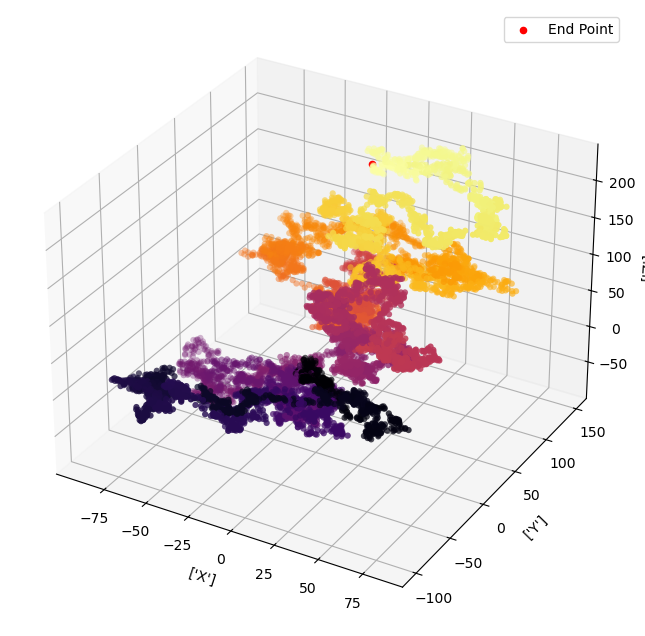

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

nsteps = np.arange(10000)
rng = np.random.default_rng(seed=84692)
x = np.array([0])
y = np.array([0])
z = np.array([0])

while True:
    if len(x) < 10000:
        for step in nsteps:
            value = rng.uniform(-1, 1)
            distance = rng.uniform(1, 5)
            x_step = x[-1] + value * distance
            x = np.append(x, x_step)

    elif len(y) < 10000:
        for step in nsteps:
            value = rng.uniform(-1, 1)
            distance = rng.uniform(1, 5)
            y_step = y[-1] + value * distance
            y = np.append(y, y_step)

    elif len(z) < 10000:
        for step in nsteps:
            value = rng.uniform(-1, 1)
            distance = rng.uniform(1, 5)
            z_step = z[-1] + value * distance
            z = np.append(z, z_step)
            
    elif (len(x) >= 10000) & (len(y) >= 10000) & (len(z) >= 10000):
        break

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
ax.scatter(x[:10000], y[:10000], z[:10000],
           c=nsteps, 
           cmap=plt.cm.inferno,
           edgecolors="none",
           )
ax.scatter(x[-1], y[-1], z[-1], c="red", marker='o', label="End Point")

ax.set(xlabel=["X"],
       ylabel=["Y"],
       zlabel=["Z"],
       )

ax.legend()

plt.show()